In [41]:
import os
import cv2
import glob
import tqdm
import time
import json
import random
import pytesseract
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
random.seed(42)

In [4]:
pytesseract.pytesseract.tesseract_cmd = r"/usr/local/Cellar/tesseract/5.3.4_1/bin/tesseract"

In [5]:
imgFiles = glob.glob("clsData/cabBills/*.png")
imgFiles

['clsData/cabBills/1781.png',
 'clsData/cabBills/188.png',
 'clsData/cabBills/1813.png',
 'clsData/cabBills/997.png',
 'clsData/cabBills/2739.png',
 'clsData/cabBills/1026.png',
 'clsData/cabBills/2923.png',
 'clsData/cabBills/2658.png',
 'clsData/cabBills/1184.png',
 'clsData/cabBills/2338.png',
 'clsData/cabBills/1584.png',
 'clsData/cabBills/1023.png',
 'clsData/cabBills/987.png',
 'clsData/cabBills/72.png',
 'clsData/cabBills/991.png',
 'clsData/cabBills/1544.png',
 'clsData/cabBills/2299.png',
 'clsData/cabBills/984.png',
 'clsData/cabBills/98.png',
 'clsData/cabBills/1182.png',
 'clsData/cabBills/465.png',
 'clsData/cabBills/1654.png',
 'clsData/cabBills/667.png',
 'clsData/cabBills/2177.png',
 'clsData/cabBills/2228.png',
 'clsData/cabBills/1655.png',
 'clsData/cabBills/2996.png',
 'clsData/cabBills/507.png',
 'clsData/cabBills/2439.png',
 'clsData/cabBills/2405.png',
 'clsData/cabBills/2945.png',
 'clsData/cabBills/660.png',
 'clsData/cabBills/1647.png',
 'clsData/cabBills/3093

In [6]:
imgName = imgFiles[1]
imgName

'clsData/cabBills/188.png'

In [7]:
img = cv2.imread(imgName, 0)
img

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

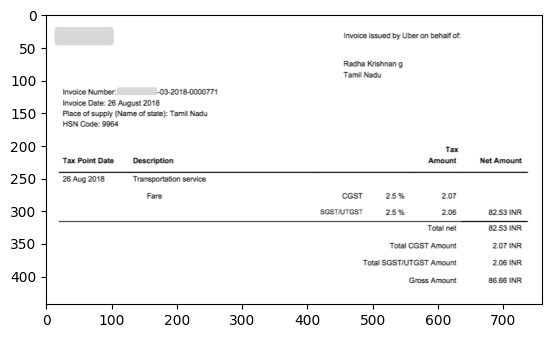

In [8]:
plt.imshow(img, cmap = "grey")

In [9]:
txtOut = pytesseract.image_to_string(img)
txtOut

'Invoice issued by Uber on behalf of\n\nRadha Krishnan g\n\nTamil Nadu\nInvoice Number: -03-2018-0000771\nInvoice Date: 26 August 2018\nace of supply (Name of state): Tamil Nadu\nHSN Code: 9964\nTax\n‘Tax Point Date Description Amount Net Amount\n26 Aug 2018 “Transportation service\nFare cost 25% 207\nscsturest 25% 206 8253 INR\nTotal net E253 INR\nTotal CGST Amount 207 INR\nTotal SGSTIUTGST Amount 2.08 INR\n(Gross Amount 86.66 INR\n'

In [10]:
ocrList = []
for i in tqdm.tqdm(imgFiles, colour = 'red'):
    img = cv2.imread(i, 0)
    txtOut = pytesseract.image_to_string(img)
    ocrList.append(txtOut)

  0%|          | 0/72 [00:00<?, ?it/s]

100%|██████████| 72/72 [00:58<00:00,  1.23it/s]


In [11]:
ocrList = list(set(ocrList)-{''})
random.shuffle(ocrList)
len(ocrList)

66

In [14]:
dataList = []
for i in tqdm.tqdm(ocrList, colour = 'blue'):
    time.sleep(0.05)
    dataList.append([i, 'Travel Category - Cab Bill/Receipt'])

100%|██████████| 66/66 [00:03<00:00, 18.04it/s]


In [21]:
dataArray = np.array(dataList)
dataArray

array([['156869707\n\n° TOTAL FARE\n\nse Pal\n\nTOTAL DISTANCE: 3.65 km\nTOTAL RIDE TIME ; 21.25 min\n\n: 0 121\n\nFARE BREAKUP TAX BREAKUP\nMinimum Bill 339.0 Service Tax 6.42\nRate after base fare: 243.47 Swachh Bharat cess 20.23\nFree ride time (0 min) 0.0 (Taxes added to your total fare)\nRi hi f\nide time charge for 21.25 431 9g\nmin\nTotal tax 36.65\nBOOKING DETAILS\nService type Ranchi, Cab, Sedan\nBooking Date 07 Dec, 2015, 08:41 pm\nPickup Date 07 Dec, 2015, 08:50 pm\n\nBooking Email id bhanus@hotmail.com\n\nsiting time during the trip.\n\nm bill of 39 Ride time at 21.5 per min , inc\n\nclu additional service t\n\nis applicable on your fare. Tot\n\ns are extra\ncing\nmplai it our Support page\n\n7 Jectronicaly generated invoice and doe quire signature. Allterms and condtions are as gv\n\nwhen the demar at we can make more cabs available\n\nefficiently\n\nSANT Technologies Pvt. Ltd\n\n',
        'Travel Category - Cab Bill/Receipt'],
       ["< Fare breakup & details\n\nFare Br

In [22]:
df = pd.DataFrame(dataArray, columns = ['OCR Contents', 'Category'])
df

,OCR Contents,Category
0,156869707\n\n° TOTAL FARE\n\nse Pal\n\nTOTAL D...,Travel Category - Cab Bill/Receipt
1,< Fare breakup & details\n\nFare Breakup\n\nDi...,Travel Category - Cab Bill/Receipt
2,Trip Bill\n\nPowered by:\n\nTAXI\nFOR SURE\n\n...,Travel Category - Cab Bill/Receipt
3,Uber\n\nPatan Rafiq Khan Invoice issued by Ube...,Travel Category - Cab Bill/Receipt
4,TOTAL FARE\n\n7468\n\n‘TOTAL DISTANCE: 21.19 k...,Travel Category - Cab Bill/Receipt
...,...,...
61,Gaurav Daga\n\nTOTAL FARE\n\n%160\n\nTOTAL RID...,Travel Category - Cab Bill/Receipt
62,eee Airtel >\n\nPrimary\nFare Breakdown\nCHARG...,Travel Category - Cab Bill/Receipt
63,Invoice issued by Uber on behalf of\n\nRadha K...,Travel Category - Cab Bill/Receipt
64,OLAR Ley\n\n“Thanks for using Olacabs\n\nTOTAL...,Travel Category - Cab Bill/Receipt


In [23]:
df.describe()

,OCR Contents,Category
count,66,66
unique,66,1
top,156869707\n\n° TOTAL FARE\n\nse Pal\n\nTOTAL D...,Travel Category - Cab Bill/Receipt
freq,1,66


In [43]:
if not os.path.isdir("jsonStuff"):
    os.makedirs("jsonStuff")

In [47]:
jsonData = df.to_json('jsonStuff/cabBills.json')
jsonData